# MTA Subway Turnstile Traffic - Exploratory Data Analysis #

### Problem Statement: ###

Identify optimal locations to dispatch a team of surveyors to gather information from subway commuters.

### Assumptions: ###

As a daily subway commuter, based on personal experience, commuters are more willing to talk to a surveyor while waiting for train than when exiting a station. So, the focus of this analysis was limited to entries into stations (commuters exiting stations were excluded)

### EDA ###

Quick and dirty function to download turnstile data from the MTA website.

In [2]:
import pandas as pd

def importMTAData(startMonthInt, endMonthInt):
    df =[]
    for m in range(startMonthInt,endMonthInt):
        for d in range(1,31):
            url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_17' + ('%02d') % (m,) + ('%02d') % (d,) + '.txt' 
            print('Trying to Reading :'+ ' '+ url)
            try:
                tempDF = pd.read_csv(url)
                print('Success!!!')
                if len(df) < 1:
                    df = tempDF 
                else:
                    df = pd.concat([df,tempDF])
            except Exception:
                pass
    return(df)
                

#df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt')

df = importMTAData(3,5)

Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170301.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170302.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170303.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170304.txt
Success!!!
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170305.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170306.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170307.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170308.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170309.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_170310.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstil

Import libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns


%pylab inline

Populating the interactive namespace from numpy and matplotlib


Examine Pandas and Numpy versions

In [3]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.19.2
Numpy version: 1.11.3


Stations such as 34th street Penn Station could have multiple lines. Concatenate station and line information

In [5]:
df['STATION'] = df['STATION'] + "_"+ df['LINENAME']

Take a look at dates in data to ensure we have good data

In [10]:
df.DATE.unique()

array(['02/25/2017', '02/26/2017', '02/27/2017', '02/28/2017',
       '03/01/2017', '03/02/2017', '03/03/2017', '03/04/2017',
       '03/05/2017', '03/06/2017', '03/07/2017', '03/08/2017',
       '03/09/2017', '03/10/2017', '03/11/2017', '03/12/2017',
       '03/13/2017', '03/14/2017', '03/15/2017', '03/16/2017',
       '03/17/2017', '03/18/2017', '03/19/2017', '03/20/2017',
       '03/21/2017', '03/22/2017', '03/23/2017', '03/24/2017',
       '03/25/2017', '03/26/2017', '03/27/2017', '03/28/2017',
       '03/29/2017', '03/30/2017', '03/31/2017', '04/01/2017',
       '04/02/2017', '04/03/2017', '04/04/2017', '04/05/2017',
       '04/06/2017', '04/07/2017', '04/08/2017', '04/09/2017',
       '04/10/2017', '04/11/2017', '04/12/2017', '04/13/2017',
       '04/14/2017', '04/15/2017', '04/16/2017', '04/17/2017',
       '04/18/2017', '04/19/2017', '04/20/2017', '04/21/2017',
       '04/22/2017', '04/23/2017', '04/24/2017', '04/25/2017',
       '04/26/2017', '04/27/2017', '04/28/2017'], dtype

Look at the first few rows

In [11]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,03:00:00,REGULAR,6064627,2055986
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,07:00:00,REGULAR,6064645,2055999
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,11:00:00,REGULAR,6064712,2056102
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,15:00:00,REGULAR,6064903,2056172
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,19:00:00,REGULAR,6065267,2056245


Looks like column names have spaces, which could end up being annoying with intellisense. Strip spaces from column names

In [12]:
df.columns = [i.strip() for i in df.columns]

In [13]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

Combine date and time columns and create new DateTime column

In [14]:
# add format to make things faster here
df['dateTime'] = pd.to_datetime(df.DATE +' '+ df.TIME, format='%m/%d/%Y %H:%M:%S')

Entries and exits columns in the data show the register value at the given time for a given turnstile. Our first approach show below was to group data by date for each turnstile and subtract min from max for entries and exits. However, this didn't work due to outliers in data. In some cases registers were being reset, possibly due to repairs.

In [15]:
key = ['C/A',
'UNIT',
'SCP',
'STATION',
 'DATE']

#df['Incr_ENTRIES'] = df.groupby(key).ENTRIES.apply(lambda x: x.order(ascending=True)).diff()
#df['Incr_EXITS'] = df.groupby(key).EXITS.diff()
entries = df.groupby(key).ENTRIES.agg(['min','max']).reset_index()
entries.rename(columns={'min':'entries_min','max':'entries_max'}, inplace=True)

entries['NoEntries'] = entries['entries_max'] - entries['entries_min']
entries.set_index(key, inplace=True)

exits = df.groupby(key).EXITS.agg(['min','max']).reset_index()
exits.rename(columns={'min':'exits_min','max':'exits_max'}, inplace=True)
exits['NoExits'] = exits['exits_max'] - exits['exits_min']
exits.set_index(key, inplace=True)

combined = entries.join(exits).reset_index()
combined['totalFootTraffic'] = combined.NoEntries + combined.NoExits

key = ['C/A',
'UNIT',
'SCP',
 'DATE']

combined.groupby('STATION').totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False)

combined.describe()

,entries_min,entries_max,NoEntries,exits_min,exits_max,NoExits,totalFootTraffic
count,2.953780e+05,2.953780e+05,2.953780e+05,2.953780e+05,2.953780e+05,2.953780e+05,2.953780e+05
mean,3.625923e+07,3.628615e+07,2.691335e+04,2.885828e+07,2.887959e+07,2.131226e+04,4.822561e+04
std,1.974338e+08,1.975094e+08,5.579632e+06,1.775061e+08,1.775790e+08,5.184643e+06,1.041379e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.803545e+05,4.822022e+05,2.370000e+02,2.350920e+05,2.360845e+05,1.230000e+02,5.370000e+02
50%,2.598348e+06,2.599984e+06,7.700000e+02,1.459615e+06,1.460731e+06,4.570000e+02,1.424000e+03
75%,6.662734e+06,6.667901e+06,1.508000e+03,4.701446e+06,4.703549e+06,1.044000e+03,2.584000e+03
max,2.130616e+09,2.130616e+09,1.938530e+09,2.087387e+09,2.087387e+09,1.703784e+09,3.457563e+09


Looks like there are outliers. It doesn't make sense 18 Av, 57st and Lorimer St stations show up as top stations for turnstile traffic. Let's dig in to find out what is going on here

In [29]:
combined.sort_values('NoEntries', ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,entries_min,entries_max,NoEntries,exits_min,exits_max,NoExits,totalFootTraffic
36759,D008,R392,00-00-02,18 AV,04/13/2017,7661697,1946191222,1938529525,11472818,1358953142,1347480324,3286009849
156189,N600,R302,00-06-00,57 ST,04/12/2017,9255532,1929351363,1920095831,6083377,1543550781,1537467404,3457563235
52600,J005,R353,00-06-00,LORIMER ST,03/26/2017,3322993,838882038,835559045,661998,167779677,167117679,1002676724
119527,N325A,R218,00-05-01,ELMHURST AV,03/31/2017,404,665416726,665416322,86,1703784429,1703784343,2369200665
257630,R415,R120,00-00-01,MORISN AV/SNDVW,03/01/2017,110,654332345,654332235,508,905991524,905991016,1560323251


In [23]:
combined[(combined['STATION']=='LORIMER ST') & (combined.DATE == '03/26/2017')].sort_values('NoEntries')

,C/A,UNIT,SCP,STATION,DATE,entries_min,entries_max,NoEntries,exits_min,exits_max,NoExits,totalFootTraffic
45750,H012,R268,01-06-02,LORIMER ST,03/26/2017,1361258,1361370,112,746620,746666,46,158
52663,J005,R353,00-06-01,LORIMER ST,03/26/2017,234923084,234923303,219,889316848,889317089,241,460
52537,J005,R353,00-00-02,LORIMER ST,03/26/2017,1662662,1663066,404,1569261,1569606,345,749
45687,H012,R268,01-06-01,LORIMER ST,03/26/2017,2716660,2717084,424,1688965,1689035,70,494
52474,J005,R353,00-00-01,LORIMER ST,03/26/2017,293048,293556,508,116621,116799,178,686
45624,H012,R268,01-06-00,LORIMER ST,03/26/2017,1391596,1392244,648,1052891,1053179,288,936
52411,J005,R353,00-00-00,LORIMER ST,03/26/2017,4551954,4552769,815,1482065,1482289,224,1039
45561,H012,R268,01-00-01,LORIMER ST,03/26/2017,7372475,7373465,990,951680,951906,226,1216
45498,H012,R268,01-00-00,LORIMER ST,03/26/2017,1180422,1181522,1100,353503,353761,258,1358
52600,J005,R353,00-06-00,LORIMER ST,03/26/2017,3322993,838882038,835559045,661998,167779677,167117679,1002676724


Here is an example of a turnstile at Lorimer Street that jumped ahead by order of magnitudes

In [28]:
df[(df.STATION=='LORIMER ST') & 
   (df.DATE == '03/26/2017') & 
   (df.UNIT =='R353') &
   (df.SCP == '00-06-00')].sort_values('dateTime')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,dateTime
36038,J005,R353,00-06-00,LORIMER ST,JM,BMT,03/26/2017,01:00:00,REGULAR,3322993,661998,2017-03-26 01:00:00
36039,J005,R353,00-06-00,LORIMER ST,JM,BMT,03/26/2017,05:00:00,REGULAR,3322999,662005,2017-03-26 05:00:00
36040,J005,R353,00-06-00,LORIMER ST,JM,BMT,03/26/2017,13:00:00,REGULAR,838881750,167779612,2017-03-26 13:00:00
36041,J005,R353,00-06-00,LORIMER ST,JM,BMT,03/26/2017,17:00:00,REGULAR,838881947,167779647,2017-03-26 17:00:00
36042,J005,R353,00-06-00,LORIMER ST,JM,BMT,03/26/2017,21:00:00,REGULAR,838882038,167779677,2017-03-26 21:00:00


### Second Approach: ###

Group by and then calculate diffs between entries/exits to get incremental entries/exits

In [30]:
key = ['C/A',
'UNIT',
'SCP',
'STATION']

def calcDiff(df):
    df = df.sort_values('dateTime')
    df['Incr_ENTRIES'] =  df.ENTRIES - df.ENTRIES.shift(1)
    df['Incr_EXITS'] = df.EXITS - df.EXITS.shift(1)
    return(df)


newDF = df.groupby(key, as_index=False).apply(lambda x: calcDiff(x)).reset_index()

Rename new columns

In [31]:
newDF = newDF[list(df.columns.values) + ['Incr_ENTRIES', 'Incr_EXITS']]

### Control for outliers ###

In [33]:
newDF.DESC.value_counts()

REGULAR       1765283
RECOVR AUD      11851
Name: DESC, dtype: int64

Removing audit entries

In [35]:
newDF = newDF[newDF.DESC != 'RECOVR AUD']

remove outlier by kicking out all negative incr_ENTRIES and incr_EXITS

In [36]:
newDF = newDF.loc[(newDF['Incr_ENTRIES']>0) & (newDF['Incr_EXITS']>0),]

In [37]:
newDF['Incr_ENTRIES'].describe()

count    1.435075e+06
mean     5.778730e+03
std      2.975335e+06
min      1.000000e+00
25%      3.400000e+01
50%      1.220000e+02
75%      3.010000e+02
max      2.020572e+09
Name: Incr_ENTRIES, dtype: float64

In [38]:
newDF['totalFootTraffic'] = newDF['Incr_ENTRIES'] + newDF['Incr_EXITS']

In [41]:
key = ['C/A',
'UNIT',
'SCP',
'STATION']

newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).head(20)
#newDF.groupby(key, as_index=False).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).reset_index()
#newDF.groupby(key, as_index=False).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).reset_index()

,sum
STATION,
57 ST,3.459017e+09
18 AV,3.404523e+09
59 ST,2.722977e+09
MORISN AV/SNDVW,1.554872e+09
LORIMER ST,1.003559e+09
86 ST,1.759065e+08
28 ST,1.382835e+08
47-50 STS ROCK,1.022195e+08
TIMES SQ-42 ST,9.368863e+07


In [42]:
newDF.Incr_ENTRIES.describe()

count    1.435075e+06
mean     5.778730e+03
std      2.975335e+06
min      1.000000e+00
25%      3.400000e+01
50%      1.220000e+02
75%      3.010000e+02
max      2.020572e+09
Name: Incr_ENTRIES, dtype: float64

Removing rows where the change between two adjacent lines is too large

In [43]:
newDF = newDF.loc[(newDF.Incr_ENTRIES < 20000) & (newDF.Incr_EXITS < 20000),]

In [44]:
newDF.Incr_ENTRIES.describe()

count    1.435026e+06
mean     2.189270e+02
std      2.741281e+02
min      1.000000e+00
25%      3.400000e+01
50%      1.220000e+02
75%      3.010000e+02
max      5.960000e+03
Name: Incr_ENTRIES, dtype: float64

In [45]:
newDF[(newDF.STATION =='34 ST-PENN STA')].totalFootTraffic.describe()

count    33629.000000
mean       493.785631
std        520.077899
min          2.000000
25%        105.000000
50%        339.000000
75%        692.000000
max       7732.000000
Name: totalFootTraffic, dtype: float64

Now it looks better

In [49]:
newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).head(10)

,sum
STATION,
34 ST-PENN STA,16605517.0
GRD CNTRL-42 ST,14322318.0
34 ST-HERALD SQ,12244105.0
23 ST,10952504.0
14 ST-UNION SQ,10944910.0
TIMES SQ-42 ST,10381959.0
42 ST-PORT AUTH,9073339.0
FULTON ST,8872094.0
86 ST,8764723.0


**For clean data use newDF from this point on**

Top 10 busiest station

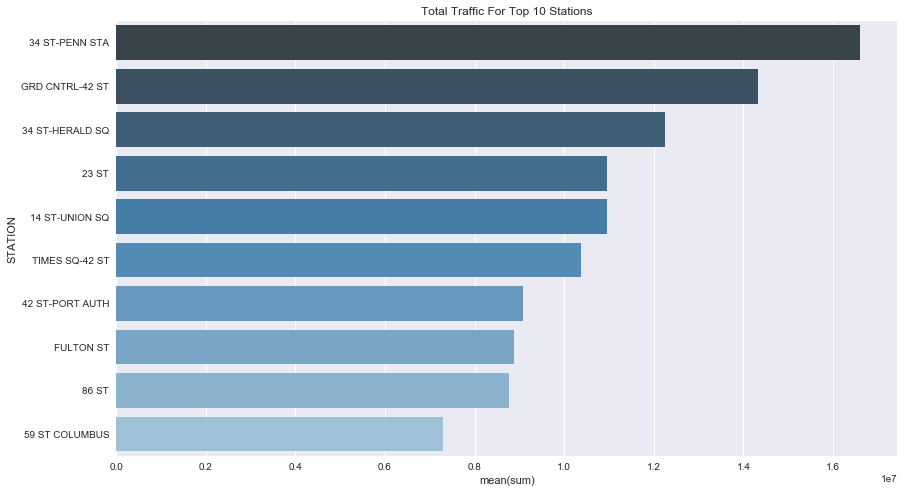

In [52]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic For Top 10 Stations")
graph1DF = newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="STATION", orient = "h", data=graph1DF, palette = "Blues_d")
plt.savefig('10TopStations.png', dpi = 1000)

In [53]:
newDF['dayOfWeek'] = newDF.dateTime.dt.weekday_name

In [54]:
newDF['IsWeekday'] = False
newDF.loc[(newDF.dayOfWeek != 'Sunday') & (newDF.dayOfWeek != 'Saturday'),'IsWeekday'] = True

Avg. Entries for Top 10 Stations

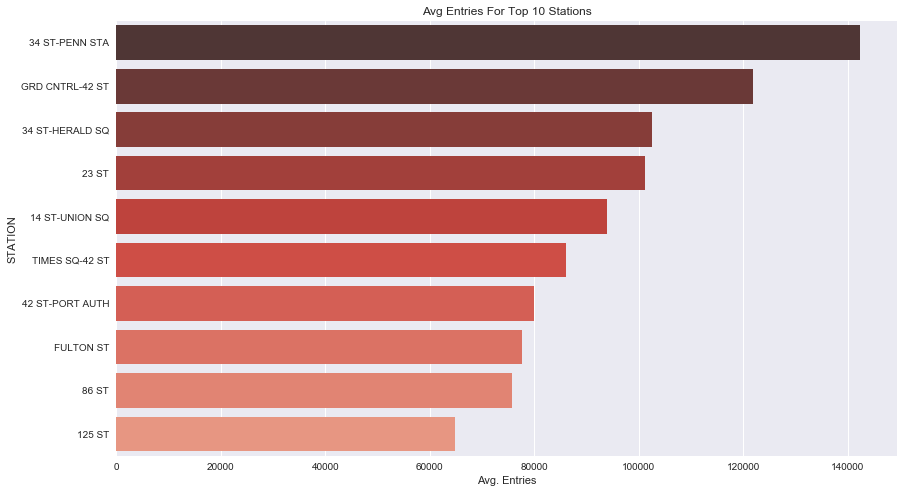

In [56]:
#Avg Entries For Top 10 Stations
entriesByStDt = newDF.groupby(['STATION','DATE','dayOfWeek']).Incr_ENTRIES.sum().reset_index()

top10St = entriesByStDt.groupby('STATION').Incr_ENTRIES.sum().reset_index().nlargest(10,'Incr_ENTRIES')[['STATION']]

entriesTop10St = top10St.merge(entriesByStDt, on='STATION')

plt.figure(figsize=(14, 8))
plt.title("Avg Entries For Top 10 Stations")
ax = sns.barplot(x="Incr_ENTRIES", y="STATION", orient = "h", data=entriesTop10St, ci=None, palette = "Reds_d")
ax.set(xlabel='Avg. Entries', ylabel='STATION')

plt.savefig('AverageEntriesForTop10Stations.png', dpi=1000)

Generate map with 10 top busiest stations mapped

In [57]:
from bokeh.io import output_file, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

In [58]:
map_options = GMapOptions(lat=40.70, lng=-73.85, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options
)

In [59]:
%matplotlib inline
plot.api_key = "bokeh api key here"


### grnd central, penn, 34th herald square, 23 st, 14stunion sq, times sq 42, 42nd st port, fulton, 86th st, 125th st
source = ColumnDataSource(
    data=dict(
        lat=[40.751849, 40.749533, 40.752247, 40.757303, 40.734836, 40.755905, 40.709938, 40.758652, 40.76811, 40.759578],
        lon=[-73.976945, -73.987899, -73.993456, -73.989787, -73.990688, -73.986504, -74.007983, -73.981311, -73.981891,-73.830056],
    )
)

circle = Circle(x="lon", y="lat", size=8, fill_color="red", fill_alpha=0.6, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
output_file("gmap_plot.html")
show(plot)

In [60]:
newDF['hour'] = newDF.dateTime.dt.hour

In [61]:
key = ['C/A',
'UNIT',
'SCP',
'STATION',
'DATE']

newDF['interval'] = newDF.groupby(key).hour.apply(lambda x: pd.cut(x,[0,4,8,12,16,20,24]))

#newDF.TIME.value_counts().head(15)
compactedByTimeInterval = newDF.groupby(['C/A',
'UNIT',
'SCP',
'STATION',
'DATE',
'interval']).Incr_ENTRIES.sum().reset_index()

compactedByTimeInterval['dayOfWeek'] = pd.to_datetime(compactedByTimeInterval.DATE).dt.weekday_name

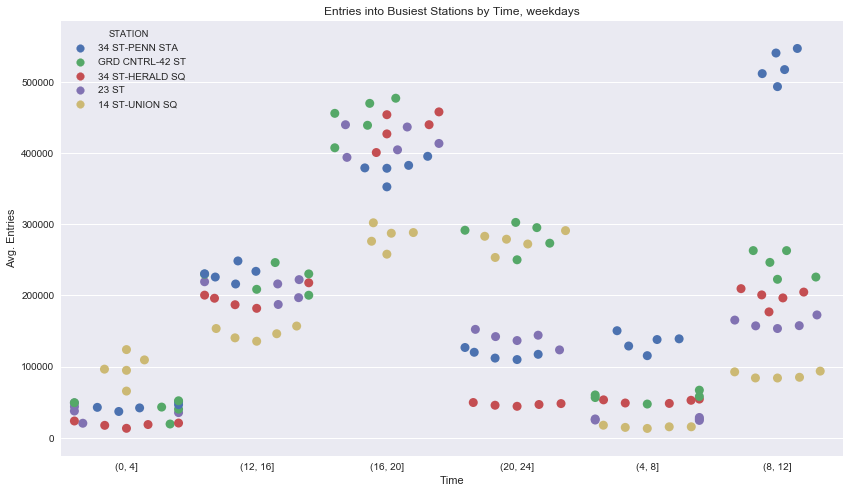

In [62]:
t = (compactedByTimeInterval[(compactedByTimeInterval.dayOfWeek != 'Sunday') & (compactedByTimeInterval.dayOfWeek != 'Saturday')]
 .groupby(['STATION', 'DATE','dayOfWeek', 'interval'])
 .Incr_ENTRIES.sum()
 .reset_index()
 .merge(top10St, on='STATION', how='right')
 .groupby(['STATION','dayOfWeek','interval'])
 .Incr_ENTRIES.sum()
 .reset_index()
)
t2 = top10St.head(5).merge(t, on='STATION')

fig = plt.figure()
ax = sns.swarmplot(x="interval", y="Incr_ENTRIES", hue='STATION', data=t2,size=9);
ax.set_title('Entries into Busiest Stations by Time, weekdays')
ax.set_ylabel('Avg. Entries')
ax.set_xlabel('Time')
fig.set_size_inches(14,8)
fig.savefig('entriesIntoBusiestStations.png',dpi=1000)

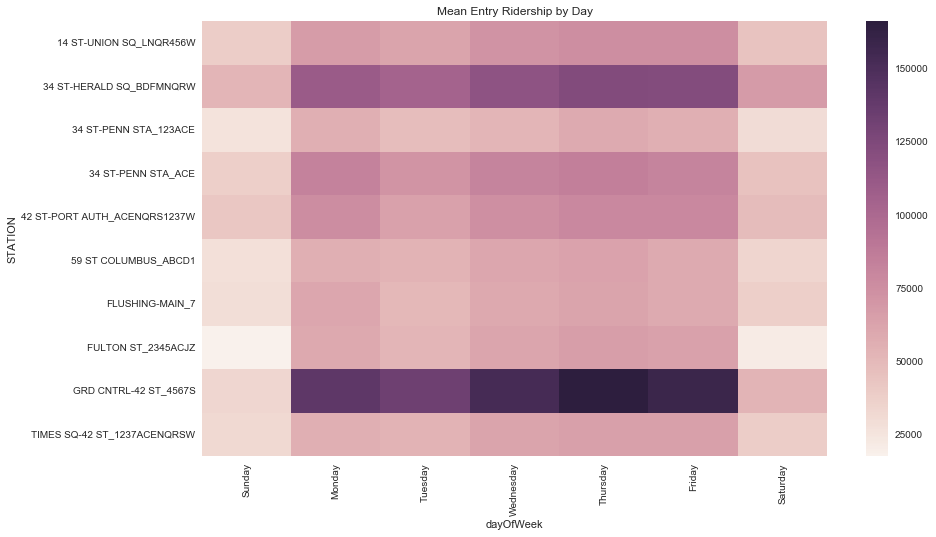

In [45]:
top10 = list(newDF.groupby(['STATION']).Incr_ENTRIES.agg(['sum']).sort_values('sum', ascending=False).head(10).reset_index()['STATION'])
tDF = newDF.groupby([
'STATION',
 'DATE','dayOfWeek']).Incr_ENTRIES.agg("sum").reset_index()

tDF2 = tDF[tDF.STATION.isin(top10)]
tDF3 = tDF2.groupby(["STATION", "dayOfWeek"]).Incr_ENTRIES.mean().reset_index()
tDF3
tDF4 = tDF3.pivot("STATION", "dayOfWeek", "Incr_ENTRIES")
tDF4 = tDF4[["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]]
fig = plt.figure()
sns.heatmap(tDF4)
plt.xticks(rotation="vertical")
plt.title("Mean Entry Ridership by Day")
fig.set_size_inches(14,8)
fig.savefig("MeanEntriesbyDay.png",dpi=1000)